### This file identifies the breakpoint in the ICD code frequencies in order to determine which ICD codes to keep in the features.

In [21]:
import pandas as pd
import numpy as np
import piecewise_regression
import matplotlib.pyplot as plt
from kneed import KneeLocator

In [22]:
# this csv file contains the counts for the number of participants that have the ICD 9 hospital codes
freq9df = pd.read_csv("diagcode_count9NEW.csv") 
freq9df.drop(["eid"], axis = 1) # dropping the numbers that identify each participant
icd9total = freq9df.sum()

# this csv file contains the counts for the number of participants that have the ICD 10 hospital codes
freq10df = pd.read_csv("diagcode_count10NEW.csv")
freq10df.drop(["eid"], axis = 1) # dropping the numbers that identify each participant
icd10total = freq10df.sum()

In [23]:
icd_freq_df = pd.concat([icd9total, icd10total], axis=0).to_frame()

In [24]:
icd_freq_df = icd_freq_df.drop(["eid"])
icd_freq_df = icd_freq_df.sort_values(by=0, ascending=False)

In [25]:
icd_codes = icd_freq_df.index
icd_codes_x = np.arange(start=0, stop=len(icd_codes), step=1)
# creating a key for each ICD code for graphing
icd_codes_dict = dict(zip(icd_codes_x.tolist(), icd_codes))

In [26]:
# getting the list of frequencies for each ICD code and the log10 of the frequencies
freq = icd_freq_df.iloc[:, 0]
freq_log = np.log10(freq)

Z867     43879
Z871     42025
Z921     38626
Z880     35613
Z966     31872
         ...  
W288         1
X860         1
V654         1
W2909        1
V936         1
Name: 0, Length: 1016, dtype: int64
Z867     4.642257
Z871     4.623508
Z921     4.586880
Z880     4.551609
Z966     4.503409
           ...   
W288     0.000000
X860     0.000000
V654     0.000000
W2909    0.000000
V936     0.000000
Name: 0, Length: 1016, dtype: float64


### Kneedle - Without Log Transformation

106


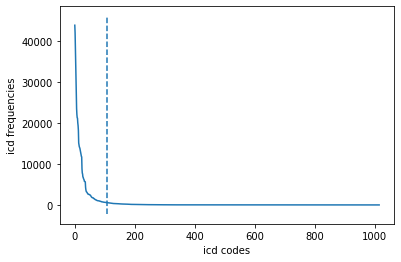

In [27]:
kn = KneeLocator(
    icd_codes_x,
    freq.tolist(),
    curve='convex',
    direction='decreasing',
    interp_method='polynomial',
)

print("Knee Point:")
print(kn.knee)
plt.xlabel('icd codes')
plt.ylabel('icd frequencies')
plt.plot(icd_codes_x, freq.tolist())
plt.vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')

In [28]:
# Checking the frequencies of the ICD codes around the knee point
print(freq.tolist()[105])
print(freq.tolist()[106])
print(freq.tolist()[107])

588
583
575


In [29]:
# Isolating the most frequent ICD codes before the knee point
key_list = np.arange(start=0, stop=107, step=1).tolist()
icd_code_list = [icd_codes_dict[x] for x in key_list]
print(icd_code_list)

['Z867', 'Z871', 'Z921', 'Z880', 'Z966', 'Z824', 'Z866', 'Z961', 'Z904', 'Z888', 'Z907', 'Z874', 'Z858', 'Z853', 'Z955', 'Z800', 'Z926', 'Z860', 'Z923', 'Z910', 'Z886', 'Z854', 'Z881', 'Z850', 'Z951', 'Z950', 'Z861', 'Z602', 'Z873', 'Z855', 'Z870', 'Z901', 'Z885', 'Z980', 'Z960', 'Z958', 'Z835', 'Z878', 'Z803', 'Z924', 'Z872', 'Z857', 'Z905', 'Z954', 'Z968', 'Z804', 'Z865', 'Z933', 'Z932', 'Z751', 'Z974', 'Z952', 'Z713', 'Z911', 'Z851', 'Z993', 'Z991', 'Z882', 'Z739', 'Z902', 'Z988', 'Z998', 'Z981', 'Z823', 'Z837', 'Z916', 'Z863', 'Z967', 'Z862', 'Z936', 'Z931', 'Z908', 'Z992', 'Z801', 'Z900', 'Z833', 'Z718', 'Z953', 'Z877', 'Z883', 'Z906', 'V184', 'Z948', 'Z856', 'Z903', 'Z572', 'W449', 'Z808', 'V180', 'Z634', 'Z733', 'Z852', 'Z884', 'W549', 'Z940', 'W239', 'Z754', 'Z887', 'V031', 'Z975', 'W579', 'Z809', 'Z740', 'Y850', 'W220', 'Y049', 'W229']


### Piecewise with Log-Transformed Frequencies


                    Breakpoint Regression Results                     
No. Observations                     1016
No. Model Parameters                    6
Degrees of Freedom                   1010
Res. Sum of Squares               7.58597
Total Sum of Squares               1262.3
R Squared                        0.993990
Adjusted R Squared               0.993955
Converged:                           True
                    Estimate      Std Err            t        P>|t|       [0.025       0.975]
----------------------------------------------------------------------------------------------------
const                4.41428       0.0177       248.89           0.0       4.3795       4.4491
alpha1            -0.0185891     0.000329      -56.427     1.63e-314    -0.019236    -0.017943
beta1               0.013426     0.000332       40.437             -     0.012774     0.014077
beta2             0.00346099     4.75e-05       72.805             -    0.0033677    0.0035543
breakpoint1      

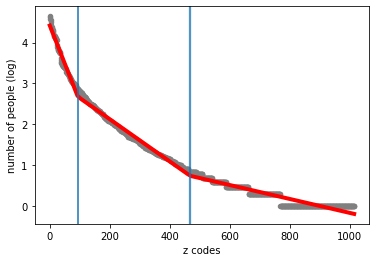

In [12]:
# ~~~~ Log Piecewise ~~~~
pw_fit_log = piecewise_regression.Fit(icd_codes_x, freq_log.tolist(), n_breakpoints=2)
pw_fit_log.summary()


# Plot the data, fit, breakpoints and confidence intervals
pw_fit_log.plot_data(color="grey", s=20)
# Pass in standard matplotlib keywords to control any of the plots
pw_fit_log.plot_fit(color="red", linewidth=4)
pw_fit_log.plot_breakpoints()
pw_fit_log.plot_breakpoint_confidence_intervals()
plt.xlabel("z codes")
plt.ylabel("number of people (log)")
plt.show()
plt.close()

In [13]:
# breakpoint1 = 93.4635
print("breakpoint 1 w log:")
print(icd_codes_dict[93])

# breakpoint2 = 467.501
print("breakpoint 2 w log:")
print(icd_codes_dict[467])

breakpoint 1 w log:
W549
breakpoint 2 w log:
Z631


### Piecewise - Without Log Transformation


                    Breakpoint Regression Results                     
No. Observations                     1016
No. Model Parameters                    4
Degrees of Freedom                   1012
Res. Sum of Squares           7.58215e+08
Total Sum of Squares          1.34759e+10
R Squared                        0.943735
Adjusted R Squared               0.943513
Converged:                           True
                    Estimate      Std Err            t        P>|t|       [0.025       0.975]
----------------------------------------------------------------------------------------------------
const                33863.1     2.95e+02       114.93           0.0   3.3285e+04   3.4441e+04
alpha1              -1028.71         15.8      -65.008           0.0      -1059.8      -997.66
beta1                1027.81         15.8        64.95             -       996.76       1058.9
breakpoint1          32.3279        0.296            -             -       31.747       32.909
-----------------

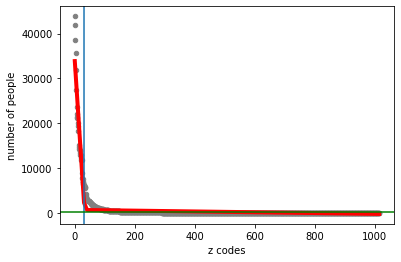

In [14]:
# ~~~~ Not Log Piecewise ~~~~
pw_fit = piecewise_regression.Fit(icd_codes_x, freq.tolist(), n_breakpoints=1)
pw_fit.summary()


# Plot the data, fit, breakpoints and confidence intervals
pw_fit.plot_data(color="grey", s=20)
# Pass in standard matplotlib keywords to control any of the plots
pw_fit.plot_fit(color="red", linewidth=4)
pw_fit.plot_breakpoints()
pw_fit.plot_breakpoint_confidence_intervals()
plt.xlabel("z codes")
plt.ylabel("number of people")
plt.axhline(y = 250, color = 'g', linestyle = '-')
plt.show()
plt.close()

In [15]:
print(freq.tolist()[32])
print(freq.tolist()[33])
j2 = [i for i in freq.tolist() if i >= 250]
print(len(j2))

5752
5749
153


In [16]:
# breakpoint: 32.3279
print("breakpoint wo log:")
print(icd_codes_dict[32])

breakpoint wo log:
Z885


In [17]:
key_list = np.arange(start=0, stop=33, step=1).tolist()
icd_code_list = [icd_codes_dict[x] for x in key_list]
print(icd_code_list)

['Z867', 'Z871', 'Z921', 'Z880', 'Z966', 'Z824', 'Z866', 'Z961', 'Z904', 'Z888', 'Z907', 'Z874', 'Z858', 'Z853', 'Z955', 'Z800', 'Z926', 'Z860', 'Z923', 'Z910', 'Z886', 'Z854', 'Z881', 'Z850', 'Z951', 'Z950', 'Z861', 'Z602', 'Z873', 'Z855', 'Z870', 'Z901', 'Z885']


### Ultimately, we decided to use the knee point from the non-transformed data.